In [1]:
pip install cimcb

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import cimcb as cb

print('All packages successfully loaded')

All packages successfully loaded


In [32]:
seed_split = 100
seed_init = 4
# seed_split = None
# seed_init = None

In [33]:
from google.colab import files

uploaded = files.upload()

Saving Data and Peak sheet_Test.xlsx to Data and Peak sheet_Test.xlsx


In [34]:
# The path to the input file (Excel spreadsheet)
filename = 'Data and Peak sheet_Test.xlsx'
#filename = 'MTBLS290db.xlsx'

# Load Peak and Data tables into two variables
dataTable, peakTable = cb.utils.load_dataXL(filename, DataSheet='Data', PeakSheet='Peaks')

Loadings PeakFile: Peaks
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 418 TOTAL PEAKS: 8765
Done!


In [35]:
# Clean PeakTable and Extract PeakList
RSD = peakTable['QC_RSD']   
percMiss = peakTable['Perc_missing']  
peakTableClean = peakTable[(RSD < 20) & (percMiss < 10)]   
peakList = peakTableClean['Name']  

print("Number of peaks remaining: {}".format(len(peakTableClean)))

Number of peaks remaining: 2259


Text(0, 0.5, 'Number of samples')

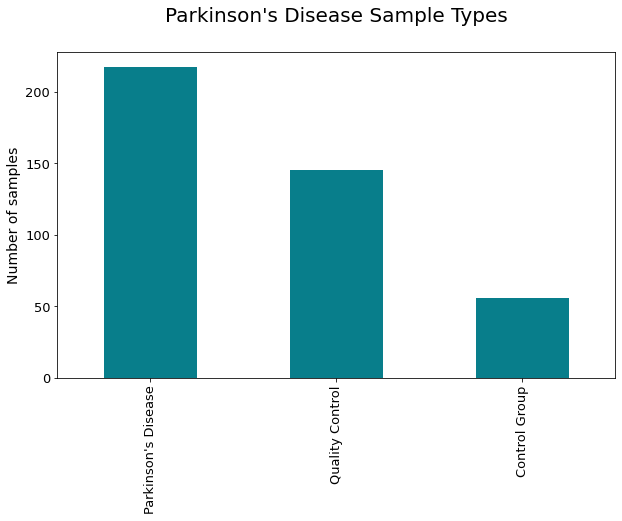

In [36]:
ax = dataTable['SampleType'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Parkinson\'s Disease Sample Types', size=20, pad=30)
ax.set_ylabel('Number of samples', fontsize=14)

Text(0, 0.5, 'Number of samples')

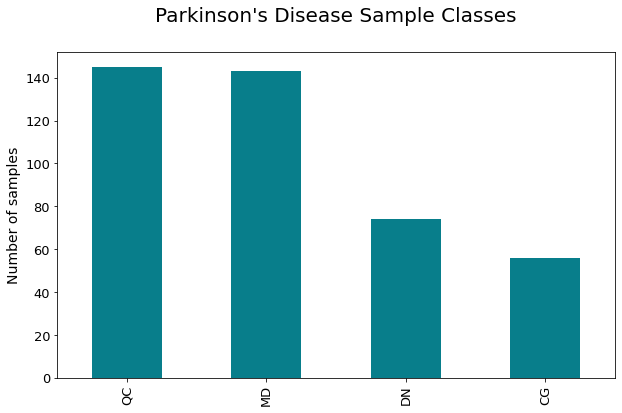

In [37]:
ax = dataTable['Class'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Parkinson\'s Disease Sample Classes', size=20, pad=30)
ax.set_ylabel('Number of samples', fontsize=14)

In [38]:
dataTable1 = dataTable[(dataTable.SampleType == "Parkinson's Disease") | (dataTable.SampleType == "Control Group")]  # Reduce data table only to MD and CG class members
pos_outcome = "Control Group"

dataTable1['SampleType'] = [0 if x == 'Parkinson\'s Disease' else 1 for x in dataTable1['SampleType']]

to_drop = ['Idx', 'SampleID', 'Class']
dataTable1.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
peaklist = peakTableClean['Name']          
X = dataTable1[peaklist]

merged = pd.concat([dataTable1['SampleType'], X], axis=1)

merged.reset_index()

,index,SampleType,M86,M132,M137,M152,M155,M162,M164,M169,...,M8608,M8612,M8642,M8655,M8663,M8685,M8699,M8715,M8729,M8731
0,146,0,31119.367640,641540.06610,26298.038630,5.625178e+06,2.782152e+07,259.651238,483626.43890,7.368964e+04,...,51430.48636,18412.69619,122545.83210,4.453929e+05,145439.29730,6388.817039,93392.022820,296245.9963,265213.4407,39629.25380
1,147,0,27945.701480,106780.30810,19688.706950,8.018405e+05,9.672048e+06,1831.516812,198939.04160,3.946194e+04,...,35678.47362,10861.17415,239517.24310,8.471789e+05,236214.90110,5990.339636,1753.076374,324820.6171,358897.4505,56602.14902
2,148,0,1611.144812,110065.23280,18313.051570,1.243397e+05,2.038063e+06,435001.709000,44944.72675,2.021782e+04,...,65091.90226,19886.06258,893440.75840,1.808965e+06,295690.87760,87458.523660,6509.821039,725412.7526,498830.0383,591755.93280
3,149,0,50276.888560,75422.40729,27554.404720,5.704878e+05,4.083986e+06,358.799341,101763.97820,1.182281e+04,...,36318.98201,14386.00915,167610.44120,2.782122e+06,223798.55400,8321.018651,1731.627238,228220.1006,312055.6068,80658.81383
4,150,0,24708.489720,56223.63935,6637.978372,2.090515e+04,3.006743e+05,146992.465900,61455.45901,8.929524e+03,...,58034.91423,12801.76426,193332.88220,1.399533e+06,177408.84740,8224.423487,3191.840128,432866.7621,551678.4753,83748.00984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,414,0,36315.412600,86565.57846,23222.337100,3.317119e+04,5.598351e+05,395.919074,66311.67700,3.275502e+04,...,46122.78831,12739.39509,133219.76360,1.078761e+06,295381.02210,5199.881800,2443.107591,231510.2665,474812.9334,88244.10204
269,415,0,35866.811280,72788.15663,19592.272360,2.460379e+04,8.047924e+05,4205.444231,92143.49205,1.329979e+04,...,46576.65965,10894.21841,96108.91507,5.902008e+05,314446.36130,4286.765742,3827.322902,160844.7708,261013.7788,42853.80034
270,416,0,21391.177550,162137.88250,29672.810360,6.222119e+04,7.550895e+05,1751.395399,50674.20452,7.157885e+04,...,68105.74186,17894.81148,111495.47910,1.733569e+06,197707.73950,9569.443883,4396.332838,237807.3456,679614.8098,67960.37908
271,417,0,495.253371,41180.48082,15250.912450,8.606017e+05,7.962703e+06,26056.057370,180570.26800,2.219288e+04,...,59691.00440,17464.24978,302805.53720,1.230356e+06,255188.68980,9543.984383,2725.212169,397531.7394,927696.7840,75193.23502


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in X.columns if X[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged.reset_index()[col] = scaled[col]

In [41]:
y1 = merged['SampleType']
merged1 = pd.concat([y1.reset_index()['SampleType'], scaled], axis=1)

display(merged1)

from sklearn.model_selection import train_test_split

X = merged1.drop('SampleType', axis=1)
y = merged1['SampleType']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

,SampleType,M86,M132,M137,M152,M155,M162,M164,M169,M173,...,M8608,M8612,M8642,M8655,M8663,M8685,M8699,M8715,M8729,M8731
0,0,0.071117,0.001317,0.449938,0.092885,0.097303,0.000426,0.107782,0.001260,0.000772,...,0.057720,0.303060,0.024880,0.000000,0.016097,0.052110,1.000000,0.042555,0.001888,0.010295
1,0,0.063829,0.000182,0.335127,0.013150,0.033585,0.003197,0.043402,0.000610,0.000107,...,0.029064,0.143391,0.080691,0.030758,0.036610,0.047451,0.007312,0.049544,0.010163,0.018502
2,0,0.003356,0.000189,0.311230,0.001950,0.006784,0.766956,0.008577,0.000244,0.000198,...,0.082572,0.334212,0.392698,0.104387,0.050050,1.000000,0.058840,0.147513,0.022522,0.277264
3,0,0.115109,0.000115,0.471762,0.009326,0.013967,0.000600,0.021426,0.000084,0.000194,...,0.030229,0.217920,0.046382,0.178885,0.033805,0.074702,0.007080,0.025919,0.006025,0.030134
4,0,0.056395,0.000074,0.108423,0.000241,0.000684,0.259142,0.012310,0.000029,0.000111,...,0.069734,0.184423,0.058655,0.073043,0.023322,0.073572,0.022898,0.075967,0.027190,0.031628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0,0.083048,0.000139,0.396510,0.000443,0.001594,0.000666,0.013409,0.000482,0.000067,...,0.048064,0.183104,0.029973,0.048487,0.049980,0.038209,0.014787,0.026723,0.020401,0.033802
269,0,0.082018,0.000109,0.333452,0.000302,0.002454,0.007383,0.019250,0.000112,0.000004,...,0.048890,0.144090,0.012267,0.011086,0.054289,0.027532,0.029781,0.009441,0.001517,0.011854
270,0,0.048777,0.000299,0.508561,0.000923,0.002280,0.003056,0.009872,0.001220,0.000187,...,0.088055,0.292110,0.019608,0.098615,0.027909,0.089299,0.035945,0.028263,0.038490,0.023994
271,0,0.000793,0.000042,0.258038,0.014122,0.027584,0.045909,0.039248,0.000281,0.000251,...,0.072747,0.283006,0.110888,0.060092,0.040898,0.089001,0.017843,0.067326,0.060401,0.027491


% Positive class in Train = 21.43
% Positive class in Test  = 18.68


In [42]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

x = np.nan_to_num(X)
Y = np.nan_to_num(y)

X_sm, y_sm = sm.fit_resample(x, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
pd.Series(y_sm).value_counts(normalize=True) * 100

Shape of X before SMOTE: (273, 2259)
Shape of X after SMOTE: (434, 2259)

Balance of positive and negative classes (%):


0    50.0
1    50.0
dtype: float64

In [43]:
# Split Data into Train (2/3rd) and Test (1/3rd)
XTrain, XTest, YTrain, YTest = train_test_split(X_sm,
                                                y_sm,
                                                test_size=1/3,
                                                random_state=seed_split)

In [44]:
# Parameter Dictionary
lr = [0.01,0.02,0.03,0.04,0.05]
neurons = [2, 3, 4, 5, 6]

param_dict = dict(learning_rate=lr,
                  n_neurons=neurons,
                  epochs=400,
                  momentum=0.5,
                  decay=0,
                  loss='binary_crossentropy')

# Initialise
cv = cb.cross_val.kfold(model=cb.model.NN_SigmoidSigmoid,
                                X=XTrain,
                                Y=YTrain,
                                param_dict=param_dict,
                                folds=5,
                                n_mc=10)

# Run 
cv.run()

Number of cores set to: 2
Running ...


100%|██████████| 250/250 [1:05:16<00:00, 15.67s/it]


Time taken: 65.92 minutes with 2 cores
Done!


In [45]:
cv.plot(metric='auc', ci=95)
cv.plot(metric='r2q2', ci=95)

/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()


/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()
/usr/local/lib/python3.7/dist-packages/cimcb/utils/color_scale.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_init = scaler.fit_transform(x[:, np.newaxis]).flatten()


In [46]:
cv.plot_projections()

In [47]:
# Build Model
model = cb.model.NN_LogitLogit(learning_rate=0.03,
                                   n_neurons=3,
                                   epochs=400,
                                   momentum=0.5,
                                   decay=0,
                                   loss='binary_crossentropy')
YPredTrain = model.train(XTrain, YTrain)
YPredTest = model.test(XTest)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]


# Evaluate Model (include Test Dataset)
model.evaluate(testset=EvalTest)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [48]:
model.permutation_test(nperm=100)

Permutation Resample: 100%|██████████| 100/100 [47:55<00:00, 28.75s/it]
